In [121]:
import pandas as pd
import matplotlib.pyplot as plt 
df=pd.read_csv('train.csv')
df=df.drop(columns='Cabin') #cabin dropped as its of no use
print(df.shape)
print(df.count()) # Here we can make out that how many values are missing from each column. In general the dataset is good.

(891, 11)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64


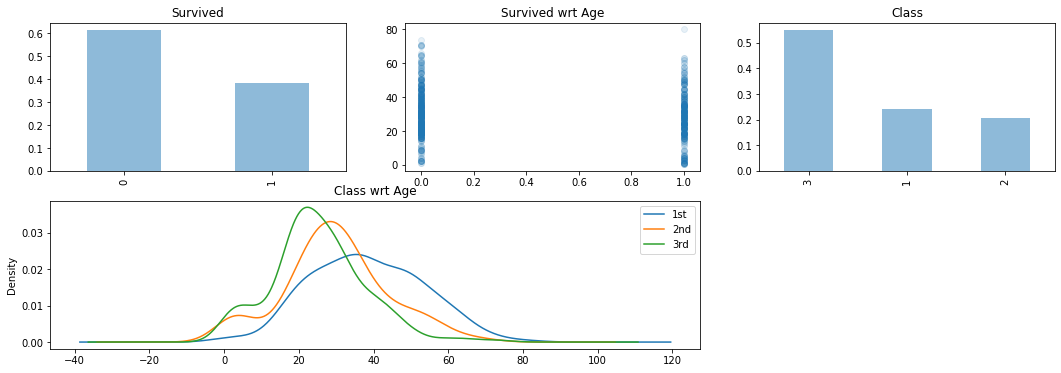

In [122]:
fig = plt.figure(figsize=(18,6))
#Bar Graph
plt.subplot2grid((2,3),(0,0))
plt.title("Survived")
df.Survived.value_counts(normalize='True').plot(kind='bar',alpha=0.5)
#Scatter plot
plt.subplot2grid((2,3),(0,1)) # To avoid overlapping of the graphs
plt.title("Survived wrt Age")
plt.scatter(df.Survived,df.Age,alpha=0.1)

#Class plot
plt.subplot2grid((2,3),(0,2))
plt.title("Class")
df.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)

#kernal density Graph
plt.subplot2grid((2,3),(1,0),colspan=2) # To avoid overlapping of the graphs
plt.title("Class wrt Age")
for x in [1,2,3]:
    df.Age[df.Pclass==x].plot(kind='kde')
plt.legend(("1st","2nd","3rd"))
    
plt.show()

In [123]:
#Handling the missing values in the data and categorical data
df['Age']=df["Age"].fillna(df["Age"].median())
#mi=df['Age'].isnull().sum()
df.loc[df['Sex']=='male','Sex']=0
df.loc[df['Sex']=='female','Sex']=1

df['Embarked']=df["Embarked"].fillna("S")
df.loc[df['Embarked']=="S",'Embarked']=0
df.loc[df['Embarked']=="C",'Embarked']=1
df.loc[df['Embarked']=="Q",'Embarked']=2

df['Fare']=df["Fare"].fillna(df["Fare"].mean())


In [124]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

target=df['Survived'].values
features=df[['Pclass','Age','Fare','Embarked','Sex','SibSp','Parch']].values

# # classifier=LogisticRegression(solver='liblinear')
# # classifier.fit(features,target)
# # print(classifier.score(features,target))

# #coverted the features to two degree polynomial to have a better score 
poly = PolynomialFeatures(2)
poly_features=poly.fit_transform(features)

classifier=LogisticRegression(solver='liblinear')
classifier.fit(poly_features,target)
print(classifier.score(poly_features,target))


In [125]:
# #cross validation

# from sklearn.model_selection import cross_val_score
# scores=cross_val_score(classifier,features,target,scoring='accuracy',cv=50)
# print(scores)
# print(scores.mean())



In [126]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(random_state=1).fit(poly_features,target)
print(dtree.score(poly_features,target)) #biased

#cross validation

score1=cross_val_score(dtree,poly_features,target,scoring='accuracy',cv=50)
print(score1)
print(score1.mean())
#change in accuracy is due to cross validation as now the model is being trained and tested at each part of training data for 50 iterations


0.9797979797979798
[0.66666667 0.61111111 0.72222222 0.88888889 0.77777778 0.83333333
 0.55555556 0.72222222 0.61111111 0.83333333 0.77777778 0.66666667
 0.83333333 0.77777778 0.77777778 0.83333333 0.94444444 0.72222222
 0.77777778 0.72222222 0.83333333 0.77777778 0.72222222 0.83333333
 0.72222222 0.83333333 0.77777778 0.83333333 0.66666667 0.77777778
 0.72222222 0.66666667 0.88888889 0.88888889 0.88888889 0.72222222
 0.72222222 0.55555556 0.72222222 0.83333333 0.88888889 0.77777778
 0.88235294 0.82352941 0.76470588 0.70588235 0.76470588 0.82352941
 0.88235294 1.        ]
0.7751633986928106


In [127]:
#predicting on test set
import pandas as pd
df1=pd.read_csv('test.csv')
df1=df1.drop(columns='Cabin')
print(df1.shape)
print(df1.count())

(418, 10)
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Embarked       418
dtype: int64


In [128]:
#Handling missing values

df1['Age']=df['Age'].fillna(df1['Age'].median())
#df1['Age'].isnull().sum()
df1['Fare']=df['Fare'].fillna(df1['Fare'].median())

df1.loc[df1['Sex']=='male','Sex']=0
df1.loc[df1['Sex']=='female','Sex']=1


df1.loc[df1['Embarked']=="S",'Embarked']=0
df1.loc[df1['Embarked']=="C",'Embarked']=1
df1.loc[df1['Embarked']=="Q",'Embarked']=2
print(df1.count())


PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Embarked       418
dtype: int64


In [129]:
X_test=df1[['Pclass','Sex','Fare','Age','SibSp','Parch','Embarked']].values
poly = PolynomialFeatures(2)
poly_features1=poly.fit_transform(X_test)

In [130]:
poly_features1

array([[1., 3., 0., ..., 0., 0., 4.],
       [1., 3., 1., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 4.],
       ...,
       [1., 3., 0., ..., 0., 0., 0.],
       [1., 3., 0., ..., 0., 0., 0.],
       [1., 3., 0., ..., 1., 1., 1.]])

In [131]:
#predicting on test set

# Y_test=classifier.predict(poly_features1)
Y_test=dtree.predict(poly_features1)



In [132]:
output = pd.DataFrame({'PassengerId': df1['PassengerId'] ,
                       'Survived': Y_test})
output.to_csv('gender_submission.csv', index=False)